# Requirements installation and imports

In [3]:
!pip install tensorflow opencv-python matplotlib tensorflow-keras

ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove Dodgy Images

In [6]:
import cv2
import imghdr

C:\Users\AKASH NATH\AppData\Local\Temp\ipykernel_10356\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [8]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion-900x387.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4

In [9]:
img_ext = ['png', 'jpg', 'jpeg', 'bmp']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

# Load Data

In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 137 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

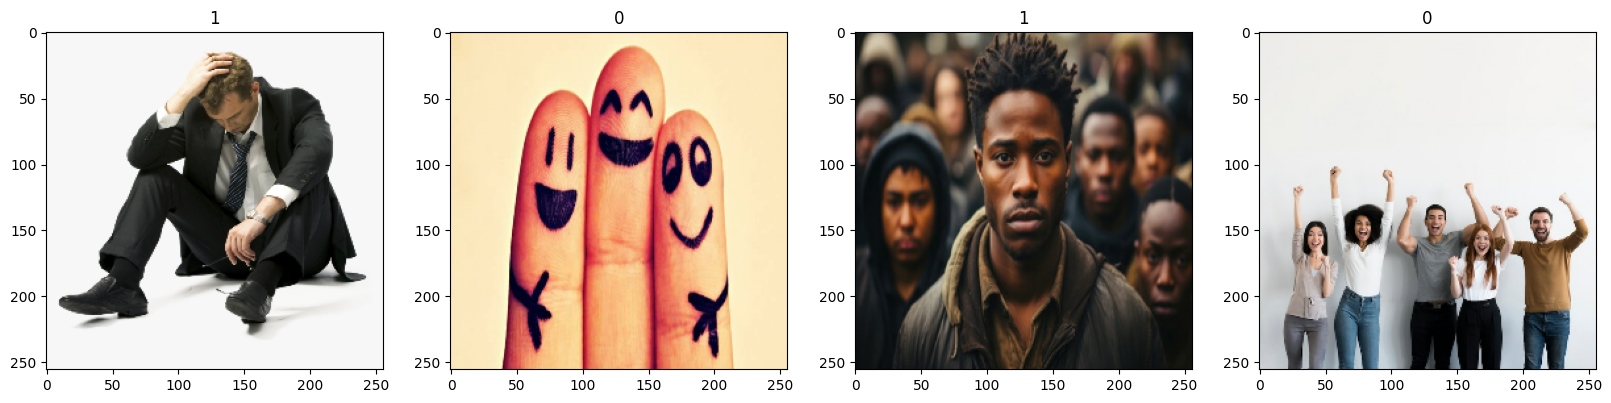

In [15]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing

## Scale Data

In [16]:
data = data.map(lambda x,y:(x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.8396982 , 0.6396982 , 0.14991575],
          [0.9212929 , 0.7214997 , 0.30430454],
          [0.9086397 , 0.7230469 , 0.44528952],
          ...,
          [0.9869715 , 0.93794423, 1.        ],
          [0.9997932 , 0.95651805, 0.9691789 ],
          [1.        , 0.9763557 , 0.99591756]],
 
         [[0.9415605 , 0.8387216 , 0.42875332],
          [0.93548447, 0.7951349 , 0.4424212 ],
          [0.8795543 , 0.7264948 , 0.48773745],
          ...,
          [0.97625226, 0.9466152 , 0.98788106],
          [0.9922585 , 0.95669365, 0.95669425],
          [0.9875446 , 0.9689088 , 0.9735037 ]],
 
         [[0.9703907 , 0.9710857 , 0.71940047],
          [0.93351275, 0.8977869 , 0.66019833],
          [0.89449847, 0.8040533 , 0.6329657 ],
          ...,
          [0.9697677 , 0.9691708 , 0.976461  ],
          [0.9651326 , 0.9646929 , 0.9418896 ],
          [0.9464635 , 0.961629  , 0.94221264]],
 
         ...,
 
         [[0.98762256, 0.98762256, 0.98762256],
          [0.98743

## Split Data

In [18]:
len(data)

5

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [20]:
train_size+val_size+test_size

5

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
len(train)+len(val)+len(test)

5

# Deep Model

## Build Deep learning Model

In [23]:
pip install tensorflow-keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [29]:
logdir = 'logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20




3/3 [==============================] - 3s 509ms/step - loss: 0.9401 - accuracy: 0.5625 - val_loss: 0.6519 - val_accuracy: 0.6562
Epoch 2/20
3/3 [==============================] - 1s 400ms/step - loss: 0.6291 - accuracy: 0.6562 - val_loss: 0.4541 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 1s 389ms/step - loss: 0.5065 - accuracy: 0.7083 - val_loss: 0.5119 - val_accuracy: 0.6562
Epoch 4/20
3/3 [==============================] - 1s 358ms/step - loss: 0.4715 - accuracy: 0.7396 - val_loss: 0.4782 - val_accuracy: 0.8125
Epoch 5/20
3/3 [==============================] - 1s 355ms/step - loss: 0.3983 - accuracy: 0.8438 - val_loss: 0.3200 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 1s 368ms/step - loss: 0.3442 - accuracy: 0.8646 - val_loss: 0.4067 - val_accuracy: 0.9062
Epoch 7/20
3/3 [==============================] - 1s 354ms/step - loss: 0.3088 - accuracy: 0.8750 - val_loss: 0.1762 - val_accuracy: 0.9062
Epoch 8/20
3/3 [=============

## Plot Performance

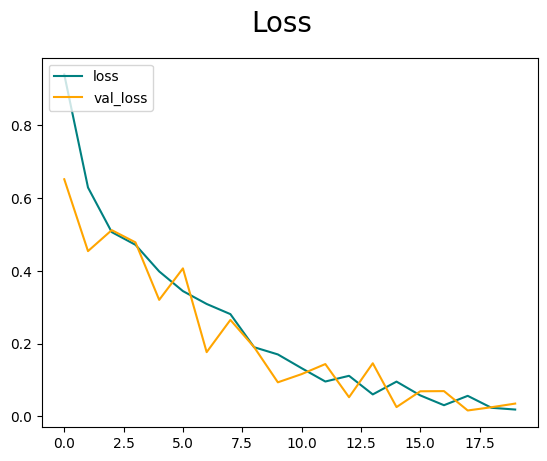

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc='upper left')
plt.show()

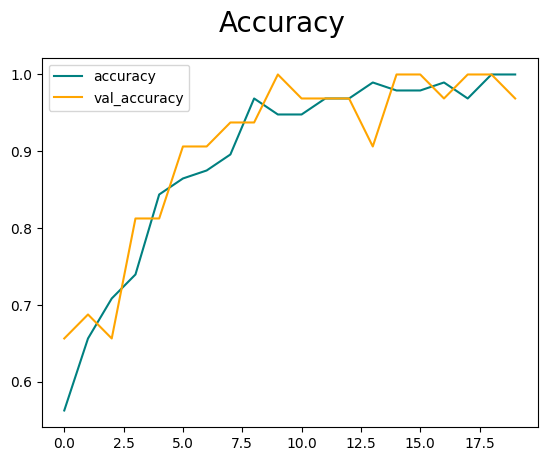

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Model

## Evaluate

In [34]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [36]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [37]:
print(f"Precision: {pre.result().numpy()},\n Recall: {rec.result().numpy()},\n Accuracy: {acc.result().numpy()}")

Precision: 1.0,
 Recall: 1.0,
 Accuracy: 1.0


## Test Outside Testing Data

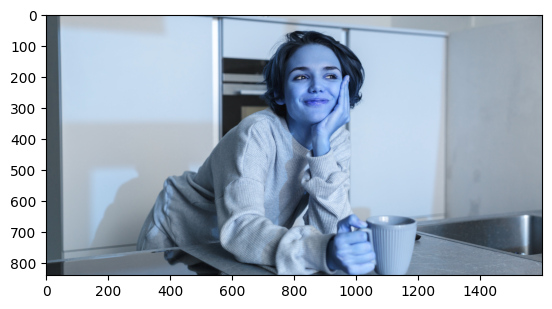

In [49]:
img = cv2.imread('test/happyTest.jpg')
plt.imshow(img)
plt.show()

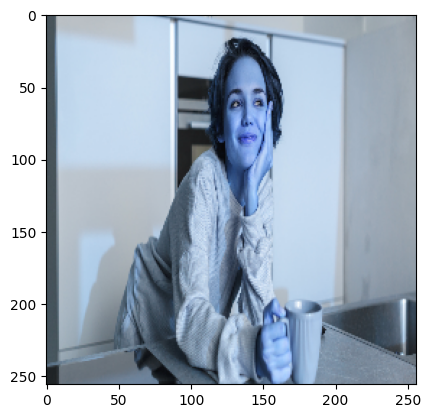

In [50]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
import numpy as np

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [53]:
yhat

array([[0.91195536]], dtype=float32)

In [54]:
if yhat > 0.5:
    print("Happy")
else:
    print("Sad")

Happy


# Saving the Model

## Saving Model in .h5 file

In [44]:
from keras.models import load_model

In [45]:
model.save(os.path.join('models', 'imageClassification.h5'))

c:\python3.11.3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Testing saved Model

In [55]:
new_model = load_model(os.path.join('models', 'imageClassification.h5'))

In [56]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


In [57]:
if yhat_new > 0.5:
    print("Happy")
else:
    print("Sad")

Happy
